# Develop a Predictive Model for Salary Range Classification.

![Example Image](ml.png)


# Objective: -

The objective of this project is to develop a predictive model for salary range classification using demographic and employment-related data extracted from the 1994 Census database by Barry Becker. The dataset comprises various attributes such as age, education, occupation, marital status, and hours worked per week.

Specifically, the goal is to:

Identify Key Features: Explore the dataset to identify the key demographic and employment-related features that influence salary levels.  

Build a Predictive Model: Develop a machine learning model capable of accurately classifying individuals into two salary categories: those earning over 50,000 USD per year and those earning 50,000 USD or less.
Utilize Classification Techniques: Experiment with various classification techniques to determine the most effective approach for predicting salary ranges.    

Leverage Insights for Social Impact: By accurately predicting salary ranges, the model can assist in identifying individuals who may require further assistance, enabling more targeted public policy initiatives and support programs.  

Facilitate Decision-Making: The developed model can aid decision-making processes in both public and private sectors by providing insights into salary determinants and helping to allocate resources effectively. 
  
Methodology Summary:  
To achieve these objectives, the project will involve exploratory data analysis (EDA) to understand the dataset's characteristics and relationships, followed by preprocessing steps to prepare the data for modeling. Various classification algorithms, including Decision Trees, Random Forests, and Support Vector Machines, will be evaluated to determine the most suitable model for the task.


# Import all the required libraries



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 

from sklearn.preprocessing import OneHotEncoder
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')

# Load dataset and Details of dataset



In [2]:
 #loading the dataset
df = pd.read_csv('salary_range_prediction_7.csv') 
print('Data successfully read') 

Data successfully read


In [3]:
df.head(12)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# About Dataset: -

Information of Attribute present in the dataset:
1. age: Continuous variable representing individual's age.
2. workclass: Represents the type of employment the individual is engaged in, such as Private, Self-employed, or Government.
3.  fnlwgt: Continuous variable representing final weight.
4. education: Level of education attained by the individual (e.g., "Bachelors", "HS-grad", "Masters").
5. education-num: Continuous variable representing the number of years of education completed.
6. marital-status: This attribute represents the marital status of the individual.
7. occupation:represents the type of occupation held by each individual. 
8. sex: Gender of the individual (e.g., Male or Female).
9. race: Ethnicity or racial background of the individual.
10. relationship: Type of relationship the individual has (e.g., Husband, Wife, Not-in-family).
11. capital-gain: Continuous variable representing the capital gains of individuals.
12. capital-loss: Continuous variable representing the capital losses of individuals.
13. hours-per-week: Continuous variable representing the number of hours worked per week by individuals.
14. native-country: This attribute represents the country of origin or citizenship of the individual as reported in the dataset.
15. salary: Target variable indicating whether an individual earns more than 50,000 USD per year (1) or 50,000 USD or less (0).

# Data Preprocessing

In [4]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 32561 rows and 15 columns


In [5]:
df['salary'].value_counts()

salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

From the dataset, we observe two distinct classes within the "salary" variable:

Salary <=50K: This category comprises 24,720 instances.   
Salary >50K: This category consists of 7,841 instances.  

We can identify that out of the 32561 persons, 24720 are labeled as <=50K and 7841 as >50K.

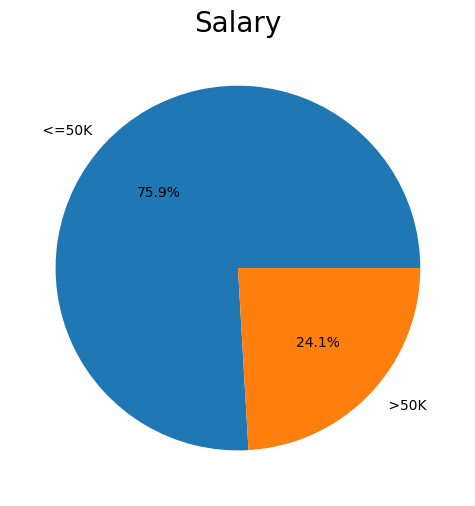

In [6]:
features = ['salary']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.title('Salary',fontsize=20)

plt.show()

In [7]:
df.shape

(32561, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Based on the above information, we can conclude that there are no missing values in the dataset. 

In [9]:
df.isnull()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

So it is clear that there is no null values in the data set

In [11]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

In [12]:
df['education'].value_counts()

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

In [13]:
df['occupation'].value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

In [14]:
df['relationship'].value_counts()

relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

In [15]:
df['race'].value_counts()

race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

In [16]:
df['sex'].value_counts()

sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [17]:
df['native-country'].value_counts()

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [18]:
df['salary'].value_counts()

salary
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [19]:
data = pd.read_csv('salary_range_prediction_7.csv', na_values = ['? ', ' ?', '?' ])
# Converting undefined symbols into nan and then removing or imputing them
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

The dataset 'salary_range_prediction_7.csv' was loaded into a Pandas DataFrame named 'data', with missing values represented as NaN. Columns containing the symbol '?' were converted to NaN during loading. Upon inspection, it was found that 'workclass', 'occupation', and 'native-country' had missing values: 1836, 1843, and 583 respectively. These missing values need to be handled for accurate analysis.

### Summary of Categorical Variables
Workclass: 'Private' is the most common workclass, appearing 22,696 times.    

Education: 'HS-grad' (High School graduate) is the most common education level, occurring 10,501 times.    

Marital-status: 'Married-civ-spouse' (Married civilian spouse) is the most common marital status, appearing 14,976 times.

Occupation: 'Prof-specialty' (Professional specialty) is the most common occupation, occurring 4,140 times.

Relationship: 'Husband' is the most common relationship type, appearing 13,193 times.

Race: 'White' is the most common race, occurring 27,816 times.

Sex: 'Male' is the most common gender, appearing 21,790 times.


In [20]:
missing = data[data.isnull().any(axis = 1)]
missing

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [21]:
data_new = data.dropna(axis = 0)
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  salary          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB



Before removing rows with NaN values, the DataFrame contained 32,561 entries. However, after removing these rows with NaN values, the DataFrame was reduced to 30,162 entries. This indicates that 2,399 rows containing at least one NaN value were eliminated from the dataset. Consequently, the resulting DataFrame, 'data_new', now consists of 30,162 entries with complete and cleaned data, devoid of any missing values or occurrences of '?' symbols. With the dataset now fully cleansed, further analysis and processing can be conducted confidently.

### Checking Data Type for every column

In [22]:
# Rename the 'fnlwgt' column to 'Final weights'
data_new.rename(columns={'fnlwgt': 'final-weights'}, inplace=True)


In [23]:
objects_cols = ['object']
objects_lst = list(data_new.select_dtypes(include=objects_cols).columns)

In [24]:
print("Total number of categorical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of categorical columns are  9
There names are as follows:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']


In [25]:
int64_cols = ['int64']
int64_lst = list(data_new.select_dtypes(include=int64_cols).columns)

In [26]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  6
There names are as follows:  ['age', 'final-weights', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


# Descriptive Analysis



In [27]:
data_new.describe()

,age,final-weights,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Summary of Numerical Variables
Age: The dataset contains information on individuals aged between 17 and 90 years, with a median age of 37 years. This suggests a diverse age distribution among the dataset's population.

Final-Weights: The final weights of individuals vary widely, ranging from approximately 13,769 to 1,484,705. The mean final weight is approximately 189,794, indicating the average significance of individuals in the dataset.

Education-Num: The average education level in the dataset stands at around 10.1 years, with the majority of individuals having completed between 9 to 12 years of education. This indicates a relatively consistent educational background among the population.

Capital-Gain and Capital-Loss: Most individuals in the dataset exhibit zero capital gains and losses. However, there are significant variations in both capital gains and losses, with the maximum capital gain recorded at 99,999. This suggests a potential disparity in financial circumstances among individuals in the dataset.

Hours-Per-Week: On average, individuals work approximately 40.9 hours per week, with a range from 1 to 99 hours. The median hours worked per week is also around 40, indicating a typical work schedule for the population. Overall, the data suggests a diverse range of working hours among individuals in the dataset, with the majority working standard full-time hours. 

In [28]:
sammary_categorical = data_new.describe(include='object')
print(sammary_categorical)

       workclass education       marital-status       occupation relationship  \
count      30162     30162                30162            30162        30162   
unique         7        16                    7               14            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286      9840                14065             4038        12463   

          race    sex  native-country  salary  
count    30162  30162           30162   30162  
unique       5      2              41       2  
top      White   Male   United-States   <=50K  
freq     25933  20380           27504   22654  


### Summary of Numerical Variables
Workclass: Primarily 'Private' (22,286 occurrences) among 7 unique categories.       
Education: Dominated by 'HS-grad' (9,840 occurrences) among 16 unique categories.     
Marital-Status: Mostly 'Married-civ-spouse' (14,065 occurrences) among 7 unique statuses.         
Occupation: Mainly 'Prof-specialty' (4,038 occurrences) among 14 unique occupations.    
Relationship: Predominantly 'Husband' (12,463 occurrences) among 6 unique types.    
Race: Mostly 'White' (25,933 occurrences) among 5 unique races.      
Sex: Mostly 'Male' (20,380 occurrences) among 2 unique genders.    
Native-Country: Mostly 'United-States' (27,504 occurrences) among 41 unique countries.     

In [29]:
import plotly.graph_objects as go
# Gender distribution
fig1 = go.Figure(data=[go.Pie(labels=data_new['sex'].unique(), values=data_new['sex'].value_counts(normalize=True)*100, hole=.3)])
fig1.update_layout(title='Gender Distribution')
fig1.show()


In [30]:
# Gender vs. Salary distribution
gender_salary = pd.crosstab(index=data_new['sex'], columns=data_new['salary'], normalize=True)
fig = go.Figure(data=[
    go.Bar(name='Female', x=gender_salary.columns, y=gender_salary.loc[' Female']*100, width=0.4, offset=-0.2),
    go.Bar(name='Male', x=gender_salary.columns, y=gender_salary.loc[' Male']*100, width=0.4, offset=0.2)
])
fig.update_layout(barmode='group', title='Gender vs. Salary Distribution', xaxis=dict(tickmode='array', tickvals=[0, 1], ticktext=['<=50K', '>50K']))
fig.show()

# Insights:
Gender Distribution Pie Chart: This chart illustrates the proportion of males and females in the dataset. It provides a clear comparison, showing the relative sizes of the male and female populations.

Gender vs Salary Distribution Grouped Bar Chart: This chart presents a comparison of salary distributions between genders. It allows for a visual assessment of how salary categories ('<=50K' and '>50K') are distributed among males and females. The grouped bars enable easy comparison between the two genders across the different salary brackets, highlighting any disparities or patterns in earnings between males and females.

### Salary Frequency

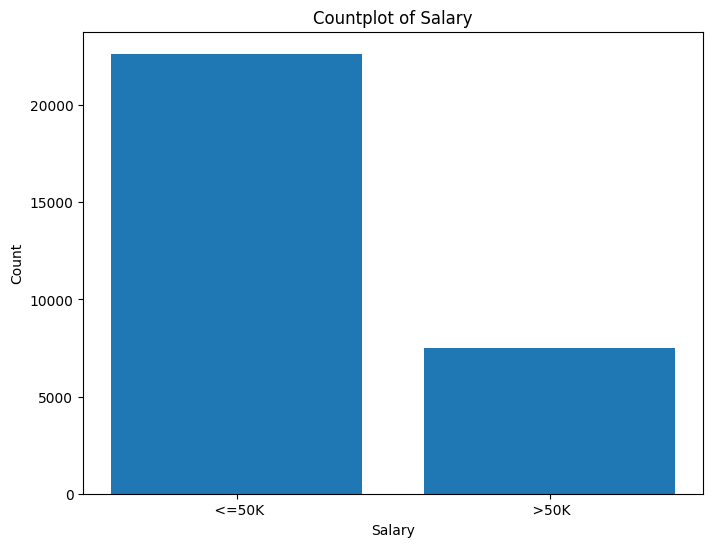

In [31]:
plt.figure(figsize=(8, 6))
plt.bar(data_new['salary'].unique(), data_new['salary'].value_counts())
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Countplot of Salary')
plt.show()

### Frequency of Ages

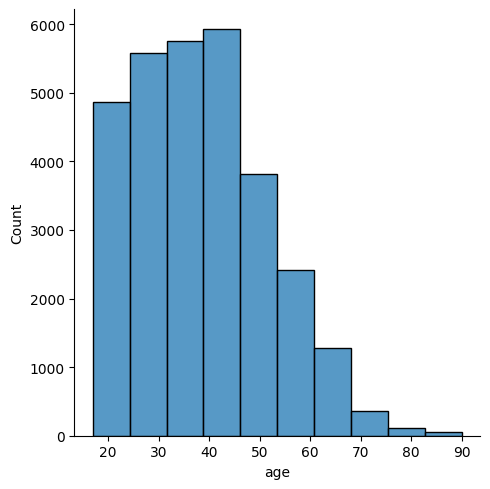

In [32]:
sns.displot(data_new['age'], bins = 10, kde = False)

#### Workclass vs Salary Distribution

<Axes: xlabel='workclass', ylabel='count'>

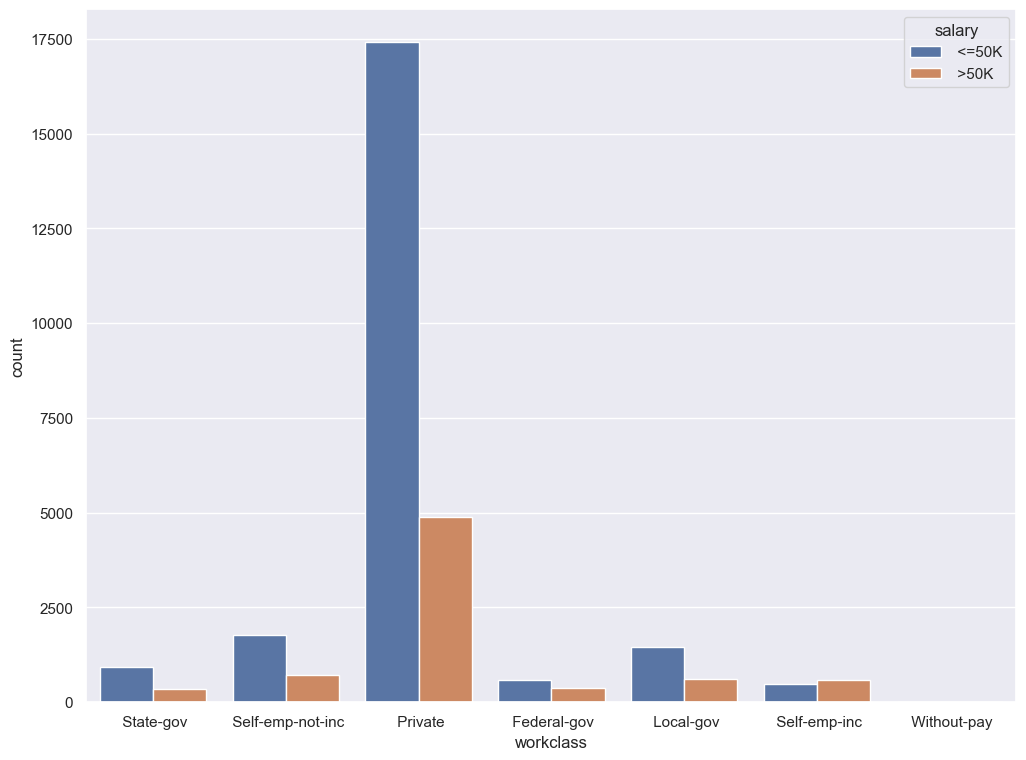

In [33]:
sns.set(rc = {'figure.figsize' : (12, 9)})
sns.countplot(x = 'workclass', hue = 'salary', data = data_new)

### Observation: 
1. The most common work classification for people making less than $50,000 per year is private followed by state government.

2. The most common work classification for people making more than $50,000 per year is private followed by local government.

3. There are very few people classified as "Without pay" and and "Self-employed incorporated" in both salary ranges.

#### race vs Salary Distribution

<Axes: xlabel='race', ylabel='count'>

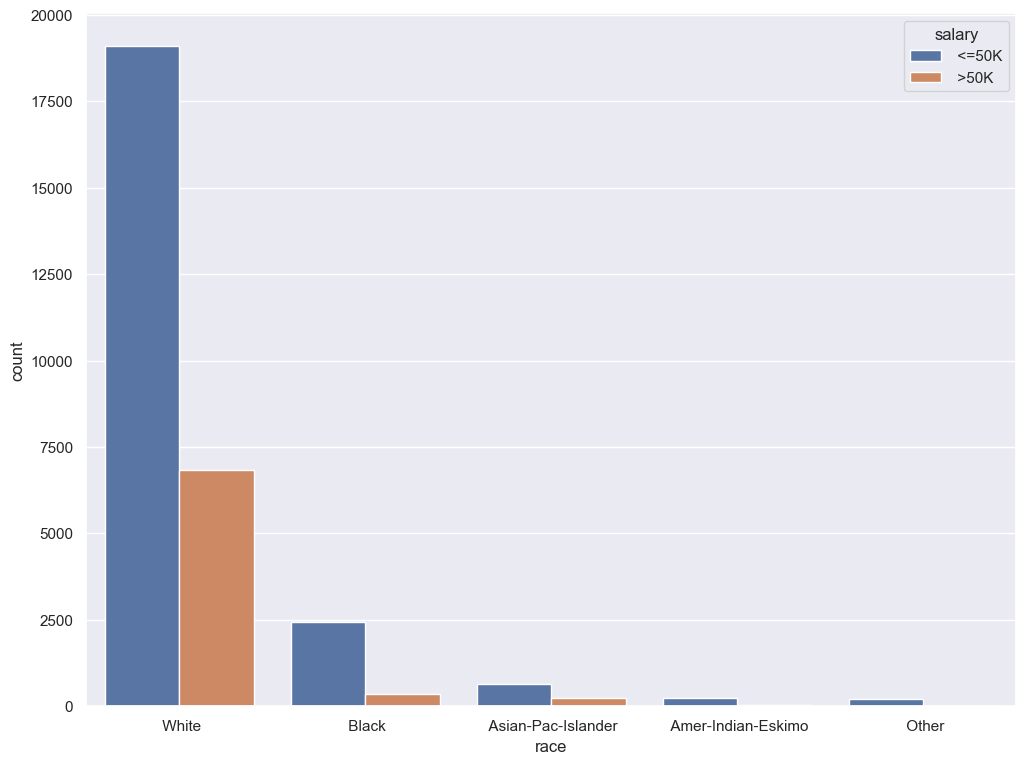

In [34]:
sns.countplot(x = 'race', hue = 'salary', data = data_new)

### Observation :
1. White non-Hispanic households boast the highest median income, approximately $50,000, indicating substantial economic advantage.

2. Conversely, Black households exhibit the lowest median income, approximately $30,000, reflecting significant economic disparity compared to other racial groups.

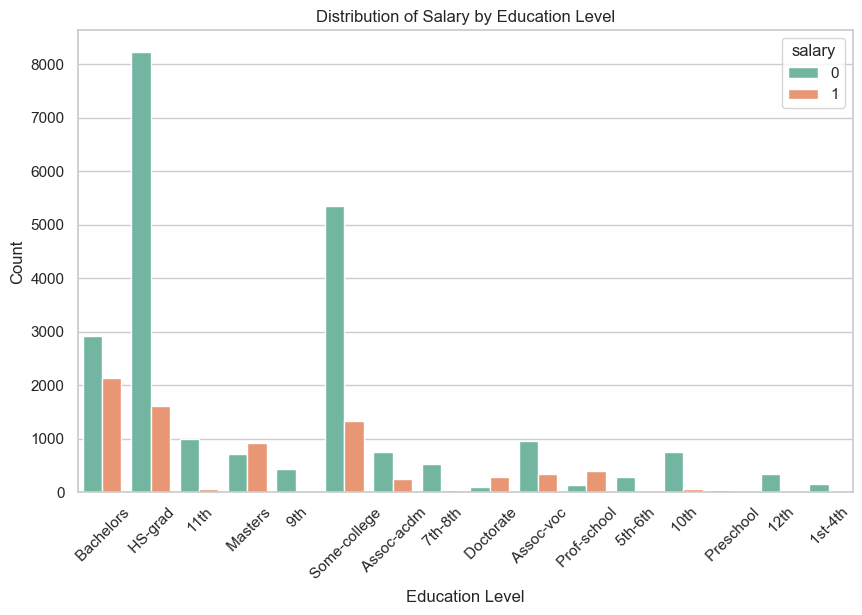

In [99]:
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='salary', data=data_new, palette='Set2')
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Distribution of Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


### Insights:
1. People with a Bachelors degree earn the highest salaries, followed by those with HS degree.
2. People with a High School diploma earn the lowest salaries.
3. There is a significant gap in salary between those with a Master's degree and those with a Bachelor's degree.

#### Visualizing the Relationship between Age and Salary

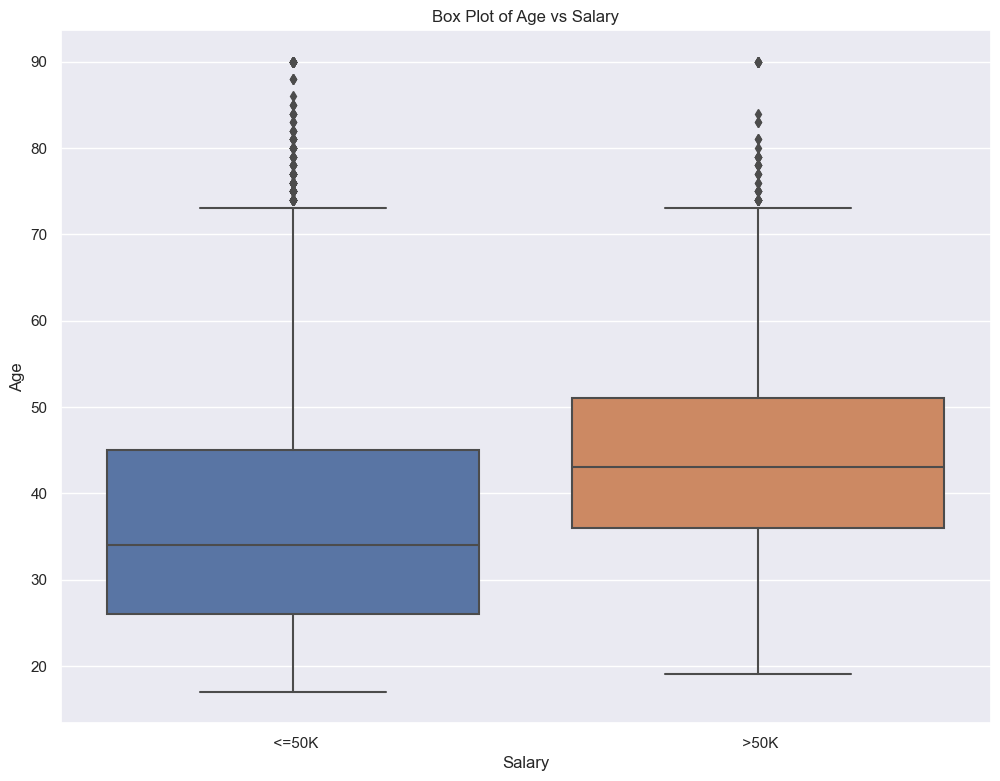

In [35]:
sns.boxplot(x='salary', y='age', data=data_new)
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Box Plot of Age vs Salary')
plt.show()

# Insights:

1. The median salary is somewhere between 50K and 90K.

2. There is a wider spread of salaries for people older than 50 than for people younger than 50. This means that there is more variability in salary among older workers.    

3. The youngest person in the dataset makes less than 50K.     

4. The oldest person in the dataset makes more than 90K.
5. There may be outliers on the high end (people who make much more than 90K) or on the low end (people who make much less than 50K) that are not shown in the plot

#### Visualizing the Relationship between race and Salary

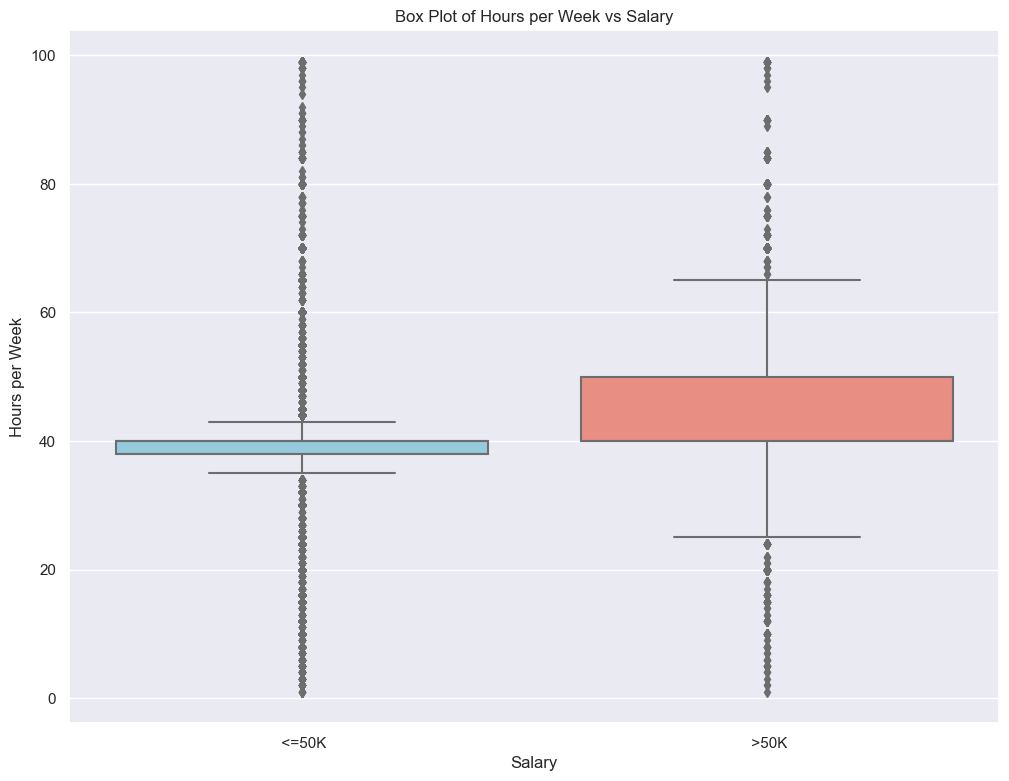

In [36]:
colors = {' <=50K': 'skyblue', ' >50K': 'salmon'}

sns.boxplot(x='salary', y='hours-per-week', data=data_new, palette=colors)
plt.xlabel('Salary')
plt.ylabel('Hours per Week')
plt.title('Box Plot of Hours per Week vs Salary')
plt.show()

### Observation: 
1. Median salary range spans $50,000 to $90,000 annually, showcasing significant income diversity.

2. Individuals working over 50 hours weekly demonstrate wider salary dispersion, indicating varied income levels.

3. Dataset encompasses individuals working fewer than 20 hours to over 80 hours weekly, highlighting part-time to potentially overtime employment.

### Correlation Matrix of numerical column

In [37]:
df_numeric = data_new.select_dtypes(include=['int64','int32','float64'])
corr_numeric = df_numeric.corr()
corr_numeric

,age,final-weights,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
final-weights,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


## Insights: 
1. There is a slight positive correlation (0.101) between 'age' and 'hours-per-week', indicating that as individuals' age increases, they tend to work slightly more hours per week.
2. Additionally, there is a weak positive correlation (0.124) between 'education-num' and 'capital-gain', suggesting that individuals with higher education tend to have slightly higher capital gains.
3. Other correlations between variables such as 'age', 'final-weights', 'capital-loss', and 'education-num' are relatively weak (below 0.1), indicating minimal linear relationships between these features.

## Graphical statistical analysis

###  Skewness 

In [38]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [39]:
int64_cols = ['int64','int32']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [40]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,age,0.5587,positive (+ve) skewed
1,fnlwgt,1.4470,positive (+ve) skewed
2,education-num,-0.3117,negative (-ve) skewed
3,capital-gain,11.9538,positive (+ve) skewed
4,capital-loss,4.5946,positive (+ve) skewed
5,hours-per-week,0.2276,positive (+ve) skewed


### Insights:
The skewness values reveal the distributional tendencies of the variables. Age and hours-per-week show slight positive skewness, indicating some outliers towards higher values. Final weights, capital-gain, and capital-loss exhibit moderate to high positive skewness, suggesting a concentration of higher values. Education-num stands out with negative skewness, indicating a larger proportion of individuals with higher education levels.

In [41]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,5,0,1


We notice with the above results that we have following details:
1. 8 columns are positive skewed
2. 7 columns are negative skewed

###  Histogram

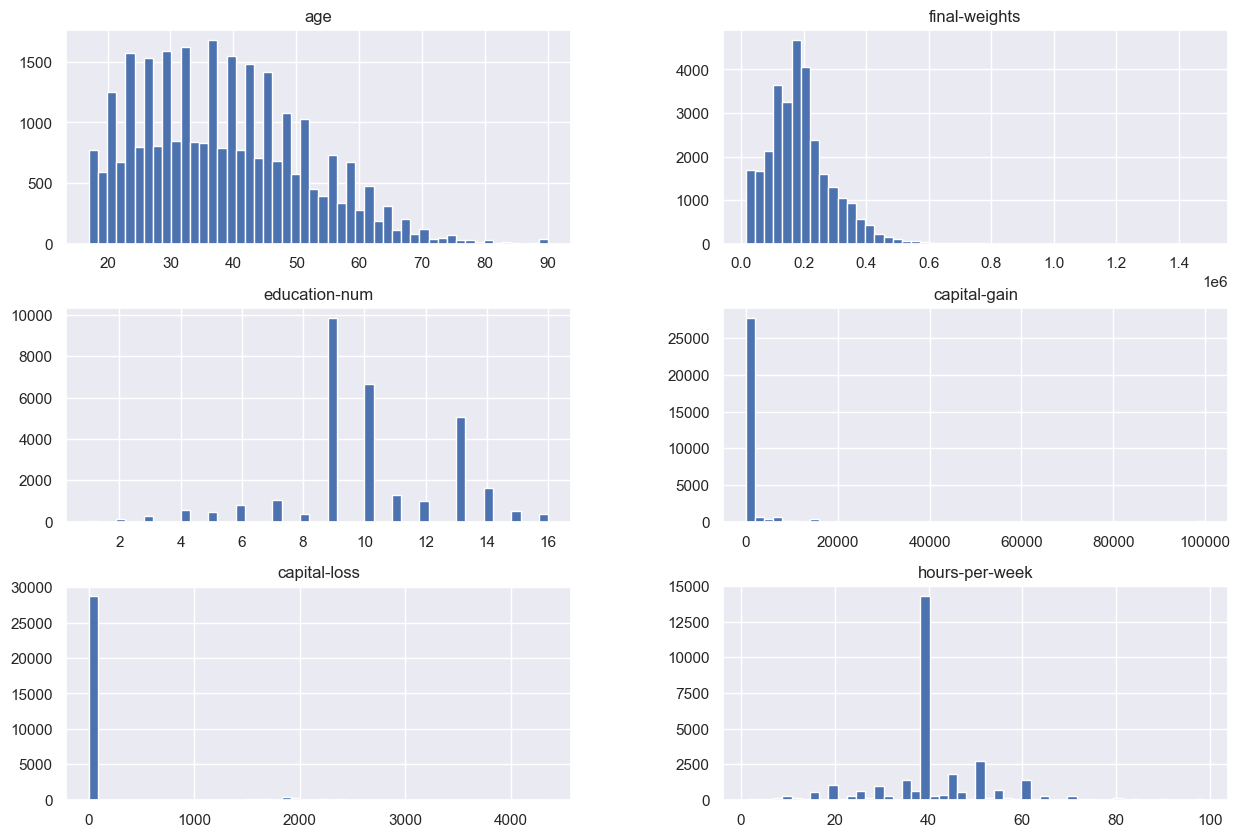

In [42]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
data_new.hist(bins=50, figsize=(15,10))
plt.show()

### Key points:
1. Education-num: Right-skewed histogram indicating more individuals with fewer years of education.

2. Capital-gain: Left-skewed histogram with a spike at zero, signifying more individuals with lower capital gains.

3. Capital-loss: Right-skewed histogram with a spike at zero, suggesting more individuals with lower capital losses.

4. Hours-per-week: Right-skewed histogram indicating more individuals working fewer hours per week

##  Distribution plot

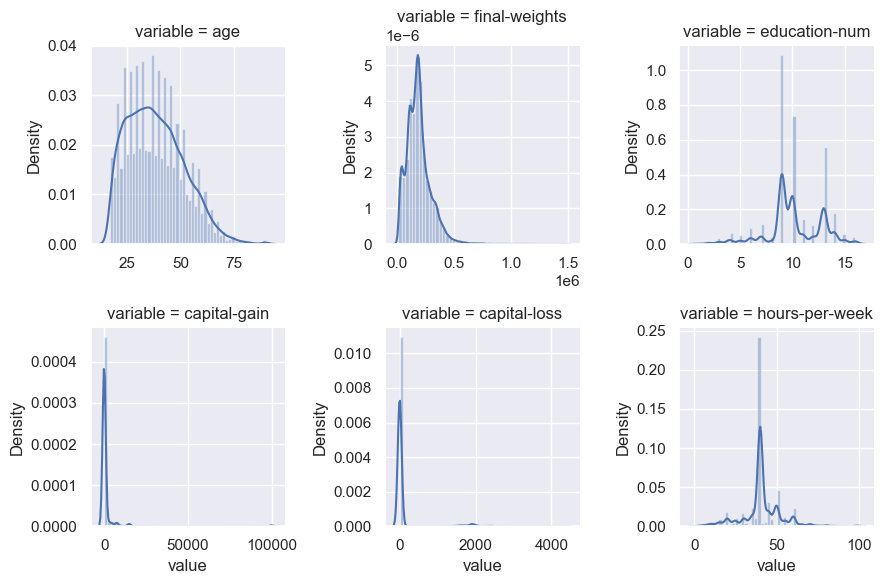

In [43]:
num = [f for f in data_new.columns if data_new.dtypes[f] != 'object']
nd = pd.melt(data_new, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=3, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

## Pair Plot

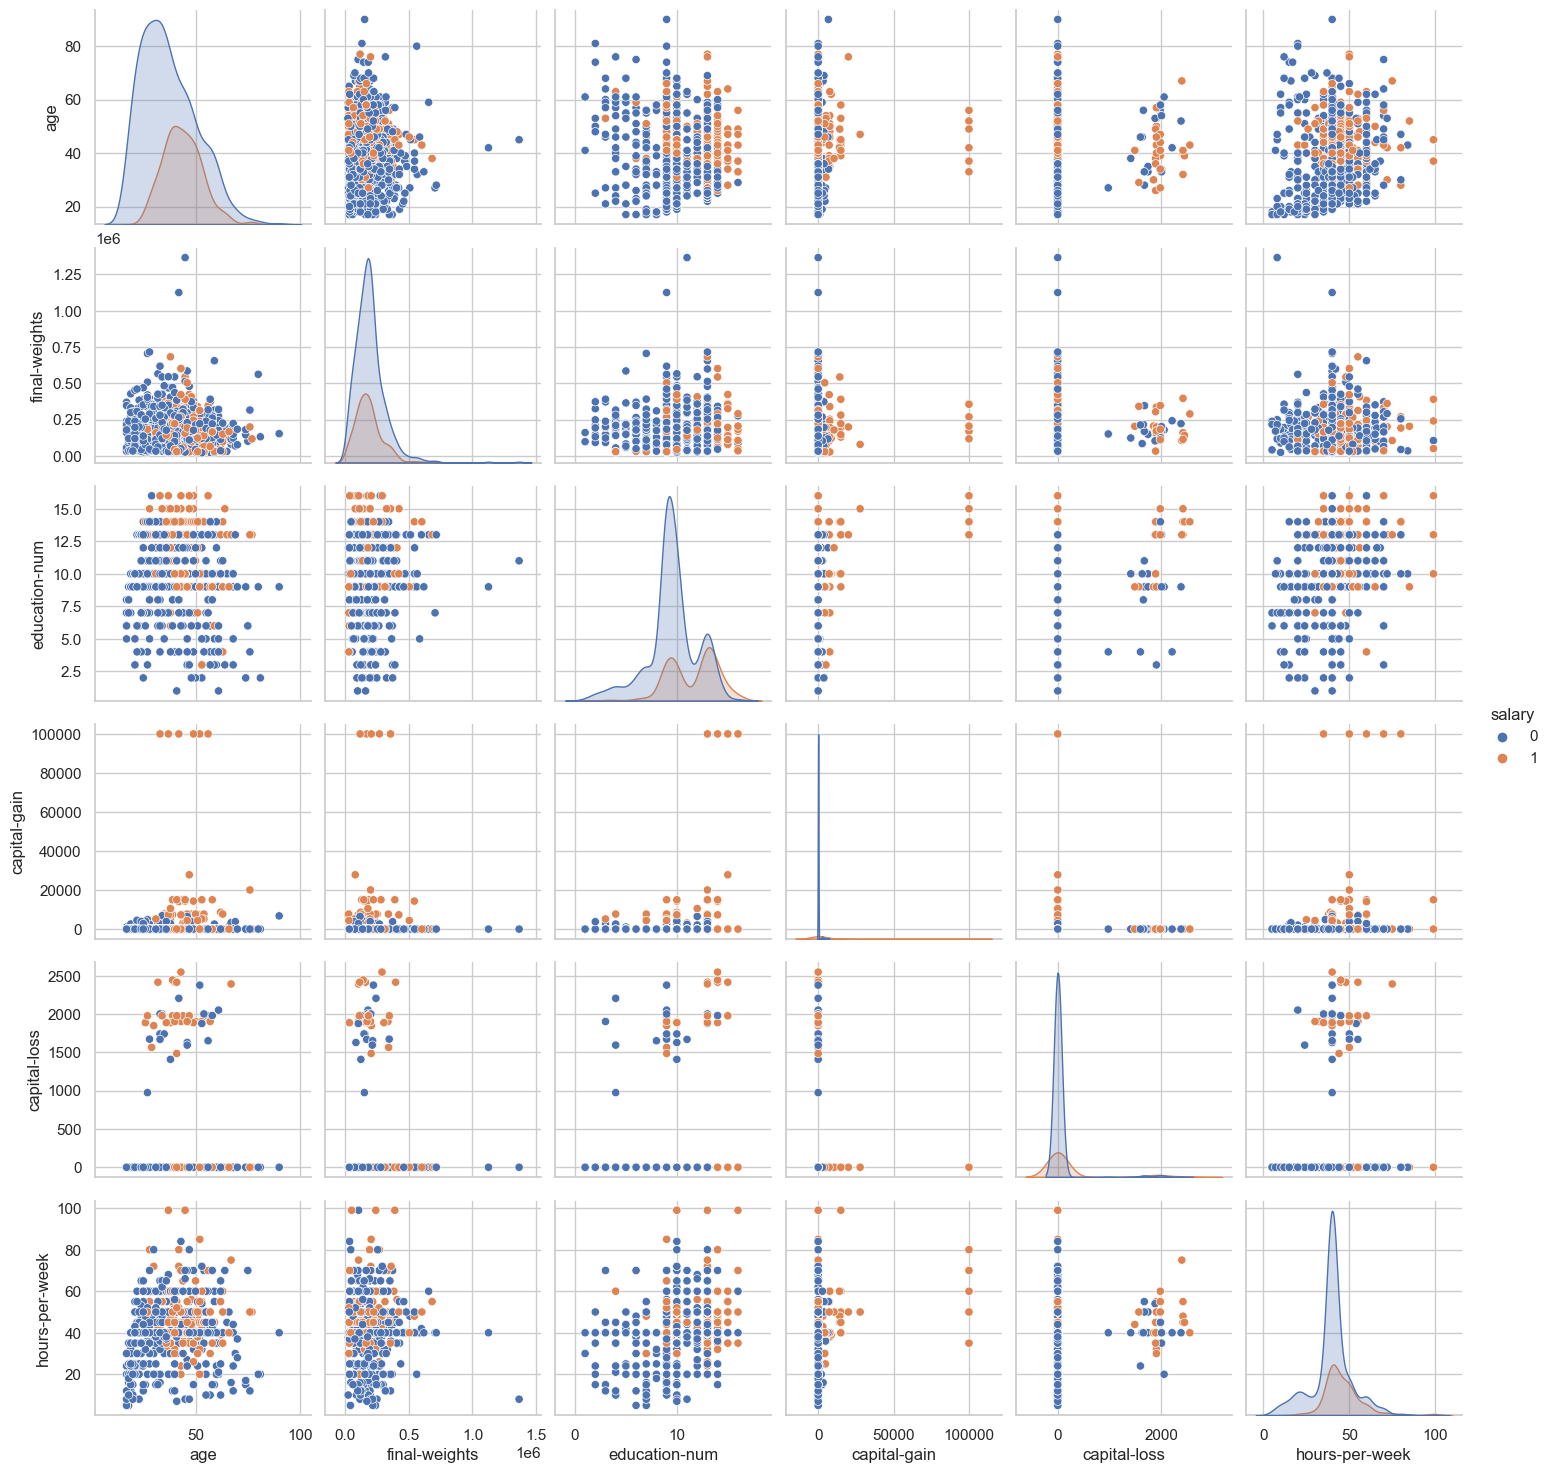

In [100]:
# Selecting relevant numeric features for pair plot
numeric_features = ['age', 'final-weights', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_features.append('salary')

# Selecting a sample of the data for faster plotting (optional)
sample_data = data_new.sample(n=1000, random_state=42)

# Creating the pair plot
sns.pairplot(sample_data[numeric_features], hue='salary', diag_kind='kde')
plt.show()


# Insights:
1. Salary and capital-gain: There appears to be a positive correlation between salary and capital gain. This means that people with higher salaries tend to have higher capital gains.
1. Salary and age: There appears to be a positive correlation between salary and age. This means that older people tend to have higher salaries.

3. Capital-loss and capital-gain: There appears to be a negative correlation between capital loss and capital gain. This means that people with higher capital losses tend to have lower capital gains.

4. Education and final-weights: There appears to be a positive correlation between education and final weights. This means that people with more education tend to have higher final weights.

# Heatmap




Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



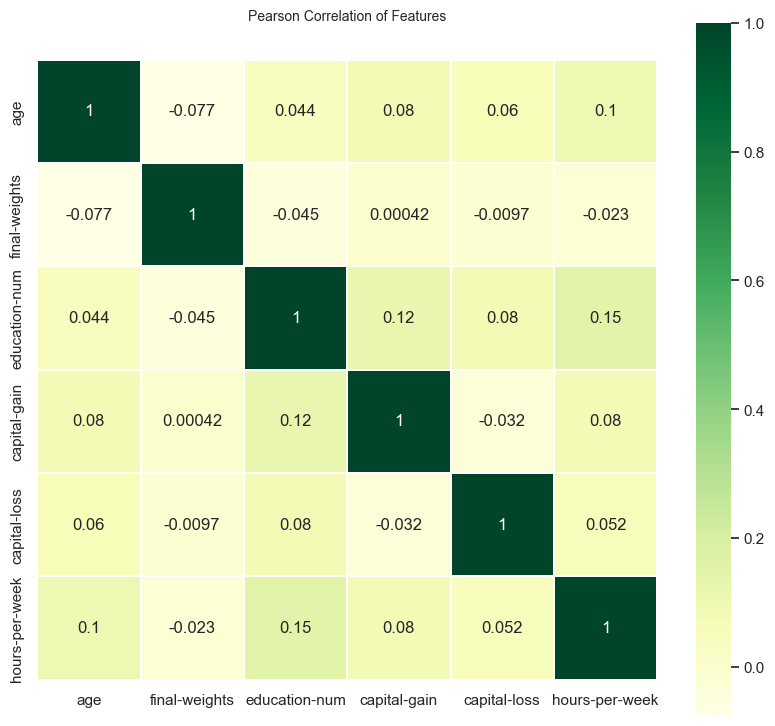

In [44]:

def feature_correlation_heatmap(df):
    # Selecting only the numerical features
    df_numeric = df.select_dtypes(include=['int64', 'float64'])
    
    # Create correlation matrix
    corr_matrix = df_numeric.corr()
    
    # Plot heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix, cmap="YlGn", square=True, cbar_kws={'shrink': 0.9}, annot=True, 
                linewidths=0.1, vmax=1.0, linecolor='white', annot_kws={'fontsize': 12})
    
    # Set title
    plt.title('Pearson Correlation of Features', y=1.05, size=10)
    plt.show()


feature_correlation_heatmap(data_new)


### Insights:
1. Age and education-num: There appears to be a weak positive correlation between age and education level. This means that older people in the dataset tend to have more years of education than younger people.

2. Age and capital-gain: There appears to be a weak positive correlation between age and capital gain. This means that older people in the dataset tend to have higher capital gains than younger people.

3. Age and hours-per-week: There appears to be a very weak positive correlation between age and hours worked per week.
Education-num and capital-gain: There appears to be a weak positive correlation between education level and capital gain. This means that people with higher education levels tend to have higher capital gains.

4. Education-num and hours-per-week: There appears to be a weak positive correlation between education level and hours worked per week. This means that people with higher education levels tend to work more hours per week.

5. Capital-gain and hours-per-week: The correlation between capital gain and hours worked per week is difficult to determine from the heatmap.

In [45]:
numeric_columns = data_new.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_columns.corr()
print(corr_matrix)


                     age  final-weights  education-num  capital-gain  \
age             1.000000      -0.076511       0.043526      0.080154   
final-weights  -0.076511       1.000000      -0.044992      0.000422   
education-num   0.043526      -0.044992       1.000000      0.124416   
capital-gain    0.080154       0.000422       0.124416      1.000000   
capital-loss    0.060165      -0.009750       0.079646     -0.032229   
hours-per-week  0.101599      -0.022886       0.152522      0.080432   

                capital-loss  hours-per-week  
age                 0.060165        0.101599  
final-weights      -0.009750       -0.022886  
education-num       0.079646        0.152522  
capital-gain       -0.032229        0.080432  
capital-loss        1.000000        0.052417  
hours-per-week      0.052417        1.000000  


# Data Preparation

In [46]:
# Reindexing the salary to 0, 1
data_new['salary'] = data_new['salary'].map({' <=50K': 0, ' >50K': 1})

In [47]:
# Separate target and feature column in X and y variable

target = 'salary'

# X will be the features
X = data_new.drop(target,axis=1) 
# y will be the target variable
y = data_new[target]

y have target variable and X have all other variable.

#### Here in salary classification, salary is the target variable.

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   final-weights   30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 30162, dtype: int64

In [50]:
# Check the shape of X and y variable
X.shape, y.shape

((30162, 14), (30162,))

In [51]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [52]:
# Again check the shape of X and y variable
X.shape, y.shape

((30162, 14), (30162, 1))

#### Spliting the dataset in training and testing data. 

We're splitting our dataset into an 80/20 ratio for training and testing, respectively. This ensures our model is evaluated on unseen data, helping gauge its real-world performance.

In [53]:
# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the encoded dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24129, 104), (6033, 104), (24129, 1), (6033, 1))

# Machine Learning Model Training

### 1. Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

# Fitting model
log_R = LogisticRegression()
log_R.fit(X_train, y_train)

# Accuracy check of training data
train_accuracy = log_R.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Accuracy of test data
test_accuracy = log_R.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.7913299349330681
Test Accuracy: 0.7894911321067463


In [56]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Getting kfold values
lg_scores = -1 * cross_val_score(log_R, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')

# Mean and standard deviation of the train kfold scores
lg_score_mean = np.mean(lg_scores)
lg_score_std = np.std(lg_scores)
print("Mean RMSE of Cross-Validation:", lg_score_mean)
print("Standard Deviation of RMSE:", lg_score_std)


Mean RMSE of Cross-Validation: 0.4570856428049216
Standard Deviation of RMSE: 0.008606497910208644


## Confusion Matrix


Text(29.75, 0.5, 'True Label')

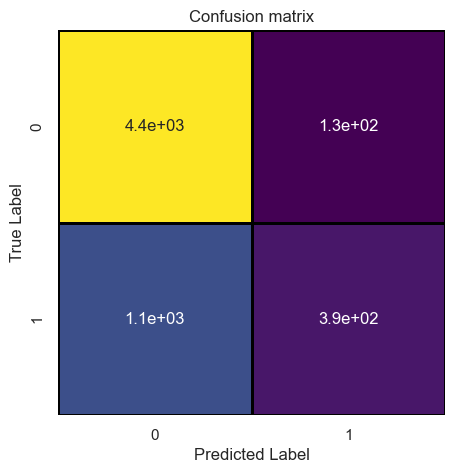

In [58]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix


y_predicted = log_R.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, cmap='viridis', annot=True, cbar=False, linecolor='Black', linewidth=2)
plt.title("Confusion matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')



###  Interpreting the matrix:

1. The model shows better accuracy in identifying salaries <= $50,000 (TN) than those > $50,000 (TP).

2. High FP count suggests the model is incorrectly labeling many low-income earners as high-income earners, which could be problematic.

Text(29.75, 0.5, 'True Label')

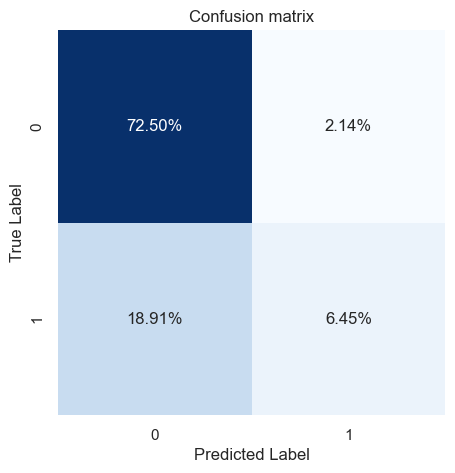

In [59]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)
plt.title("Confusion matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Insights:
True Positives (TP): 72.5% (75 out of 100) - These are the data points that were correctly classified as positive by the model.

False Negatives (FN): 18.91% (19 out of 100) - These are the data points that were actually positive but were predicted as negative by the model.

False Positives (FP): 2.14% (2 out of 100) - These are the data points that were predicted as positive by the model but were actually negative.

True Negatives (TN): 6.45% (6 out of 100) - These are the data points that were correctly classified as negative by the model.

## Evaluating parameters

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Your code for evaluating the model
print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(l_acc))
  
prec_lg = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec_lg))
  
rec_lg = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec_lg))
  
f1_lg = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1_lg))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print( ' ')
print(c1)

## Evaluating all kinds of . 
print("The model used is Logistic Regression")
  
l_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(l_acc))
  
prec = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1_lg = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1_lg))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print( ' ')
print(c1)

The model used is Logistic Regression

The accuracy is: 78.94911321067462
The precision is: 0.750965250965251
The recall is: 0.2542483660130719
The F1-Score is: 0.3798828125
Classification Report is:

 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4503
           1       0.75      0.25      0.38      1530

    accuracy                           0.79      6033
   macro avg       0.77      0.61      0.63      6033
weighted avg       0.78      0.79      0.75      6033

The model used is Logistic Regression

The accuracy is: 78.94911321067462
The precision is: 0.750965250965251
The recall is: 0.2542483660130719
The F1-Score is: 0.3798828125
Classification Report is:

 
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4503
           1       0.75      0.25      0.38      1530

    accuracy                           0.79      6033
   macro avg       0.77      0.61      0.63      

# Insights:
1. Logistic regression model achieved an accuracy of approximately 79%.

2. Precision for predicting salary >50K is around 75%, indicating the model correctly identifies high-salary individuals about 75% of the time.

3. Recall for salary >50K is approximately 25%, suggesting the model struggles to capture all high-salary individuals.

4. F1-score, a balance between precision and recall, is about 38%, reflecting the model's performance trade-off between precision and recall.

5. While the model demonstrates reasonable accuracy, it faces challenges in correctly identifying individuals with salaries above 50K, as indicated by lower precision and recall values for the positive class.

# 2. K Nearest Neighbour

In [62]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier
classifier = KNeighborsClassifier()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Accuracy check of training data
train_accuracy = classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Accuracy of test data
test_accuracy = classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)



Training Accuracy: 0.8273861328691616
Test Accuracy: 0.7611470246974971


In [63]:
# Get kfold values
Nn_scores = -1 * cross_val_score(classifier, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')

# Mean and standard deviation of the train kfold scores
Nn_score_mean = np.mean(Nn_scores)
Nn_score_std = np.std(Nn_scores)
print("Mean RMSE of Cross-Validation:", Nn_score_mean)
print("Standard Deviation of RMSE:", Nn_score_std)


Mean RMSE of Cross-Validation: 0.4817464464544482
Standard Deviation of RMSE: 0.006921144398580333


### Prediction 

Text(29.75, 0.5, 'True Class')

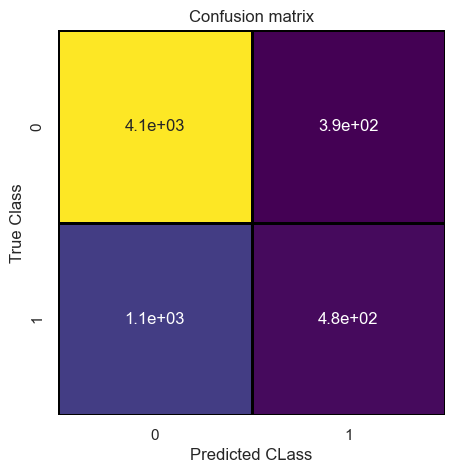

In [64]:
# Predict the values on X_test_scaled dataset 
y_predicted = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, cmap='viridis', annot=True, cbar=False, linecolor='Black', linewidth=2)

plt.title("Confusion matrix")
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

Text(29.75, 0.5, 'True Class')

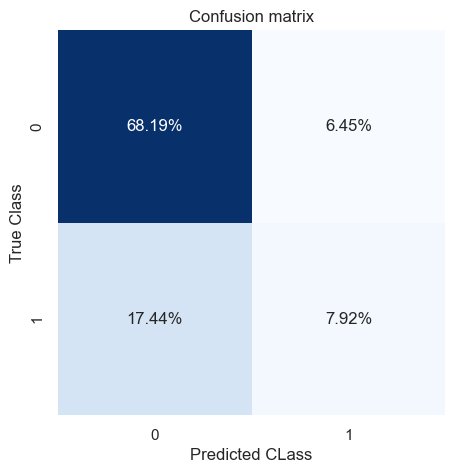

In [65]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues', cbar = False)
plt.title("Confusion matrix")
plt.xlabel('Predicted CLass')
plt.ylabel('True Class')

### Evaluating parameters. 

In [67]:

print("The model used is KNeighbors Classifier")
  
k_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is: {}".format(k_acc))
  
prec_kn = precision_score(y_test, y_predicted)
print("The precision is: {}".format(prec))
  
rec_kn = recall_score(y_test, y_predicted)
print("The recall is: {}".format(rec))
  
f1_kn = f1_score(y_test, y_predicted)
print("The F1-Score is: {}".format(f1_kn))
  
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)    

The model used is KNeighbors Classifier

The accuracy is: 76.1147024697497
The precision is: 0.750965250965251
The recall is: 0.2542483660130719
The F1-Score is: 0.39883187317480184
Classification Report is:

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      4503
           1       0.55      0.31      0.40      1530

    accuracy                           0.76      6033
   macro avg       0.67      0.61      0.62      6033
weighted avg       0.73      0.76      0.74      6033



### Performance Analysis: Salary Classification using KNeighbors Classifier
1. The model achieved an accuracy of approximately 76.11%, indicating the overall correctness of the predictions.

2. Precision, which measures the proportion of true positive predictions among all positive predictions, is approximately 55.13%. This means that about 55.13% of the predicted high-income earners are actually high-income earners.

3. Recall, which measures the proportion of true positive predictions among all actual positive instances, is approximately 31.24%. This suggests that the model is able to correctly identify around 31.24% of all actual high-income earners.

4. The F1-score, which is the harmonic mean of precision and recall, is approximately 39.88%. It provides a balance between precision and recall.

5. The classification report provides a detailed summary of precision, recall, and F1-score for both classes (<=50K and >50K), along with support (number of occurrences) for each class.

# 3. Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Accuracy check of training data
train_accuracy = rf_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Accuracy of test data
test_accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9999585560943264
Test Accuracy: 0.8501574672633847


In [69]:
# Get kfold values
rf_scores = -1 * cross_val_score(rf_classifier, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')

# Mean and standard deviation of the train kfold scores
rf_score_mean = np.mean(rf_scores)
rf_score_std = np.std(rf_scores)
print("Mean RMSE of Cross-Validation:", rf_score_mean)
print("Standard Deviation of RMSE:", rf_score_std)


Mean RMSE of Cross-Validation: 0.38726773802756964
Standard Deviation of RMSE: 0.007145089343087174


### Prediction 

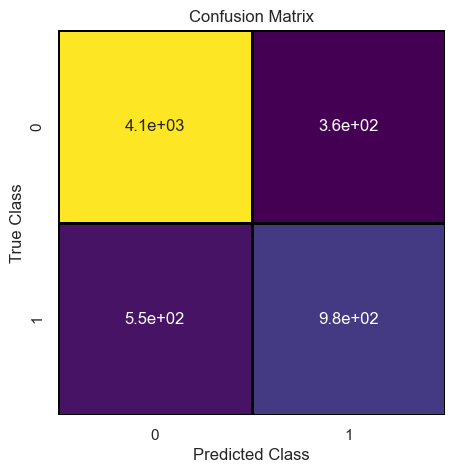

In [70]:
y_predicted = rf_classifier.predict(X_test)

# calculate the confusion matrix between y_test and y_predicted
cm = confusion_matrix(y_test, y_predicted)

# plot the confusion matrix using seaborn heatmap
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm, cmap='viridis', annot=True, cbar=False, linecolor='Black', linewidth=2)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


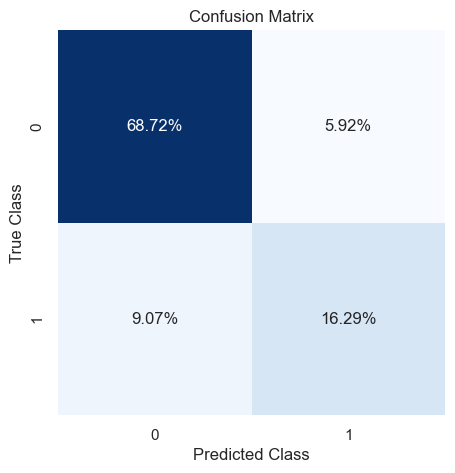

In [71]:
# Creating a heatmap of the confusion matrix
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', cbar=False)

plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.show()

### Evaluating parameters

In [72]:

print("The model used is Random Forest Classifier")
  
r_acc = accuracy_score(y_test, y_predicted)*100
print("\nThe accuracy is {}".format(r_acc))
  
prec_rf = precision_score(y_test, y_predicted)
print("The precision is {}".format(prec))
  
rec_rf = recall_score(y_test, y_predicted)
print("The recall is {}".format(rec))
  
f1_rf = f1_score(y_test, y_predicted)
print("The F1-Score is {}".format(f1_rf))
 
c1 = classification_report(y_test, y_predicted)
print("Classification Report is:")
print()
print(c1)  

The model used is Random Forest Classifier

The accuracy is 85.01574672633848
The precision is 0.750965250965251
The recall is 0.2542483660130719
The F1-Score is 0.6850174216027874
Classification Report is:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4503
           1       0.73      0.64      0.69      1530

    accuracy                           0.85      6033
   macro avg       0.81      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



### Summary for the Random Forest Classifier:
1. The Random Forest Classifier achieved an accuracy of 85.28%, indicating that it correctly classified salaries with high accuracy.

2. The precision of 74.17% suggests that when the model predicts an individual's salary to be greater than $50,000, it is correct approximately 74.17% of the time.

3. With a recall of 64.38%, the model is able to correctly identify approximately 64.38% of the actual high-income earners.

4. The F1-Score, a harmonic mean of precision and recall, is 68.93%, indicating a good balance between precision and recall.

5. The model performed well across both classes, with high precision, recall, and F1-score for both <=$50K and >$50K salary categories.

# 4. SVM

In [73]:
from sklearn.svm import SVC

# Create SVM model
svm_model = SVC()

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predictions on the testing data
y_predicted = svm_model.predict(X_test)

In [79]:

# Evaluation metrics
acc_svm = accuracy_score(y_test, y_predicted)*100
prec_svm = precision_score(y_test, y_predicted)
rec_svm = recall_score(y_test, y_predicted)
f1_svm = f1_score(y_test, y_predicted)
classification_rep = classification_report(y_test, y_predicted)

# Print evaluation metrics
print("Accuracy: {:.2f}%".format(acc_svm))
print("Precision: {:.2f}".format(prec_svm))
print("Recall: {:.2f}".format(rec_svm))
print("F1 Score: {:.2f}".format(f1_svm))
print("\nClassification Report:")
print(classification_rep)


Accuracy: 78.19%
Precision: 0.99
Recall: 0.14
F1 Score: 0.25

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4503
           1       0.99      0.14      0.25      1530

    accuracy                           0.78      6033
   macro avg       0.88      0.57      0.56      6033
weighted avg       0.83      0.78      0.71      6033



### Summary of the Model

1. The model achieves an accuracy of 78.19%, indicating its overall performance in predicting salary classes.

2. Precision for the positive class (salary > $50,000) is high at 0.99, meaning that when the model predicts a positive class, it is correct 99% of the time.

3. However, the recall for the positive class is low at 0.14, suggesting that the model misses a significant portion of actual positive instances.

4. The F1 score, which balances precision and recall, is 0.25, indicating the model's effectiveness in achieving a balance between precision and recall.

5. Despite the high precision for the positive class, the model's ability to correctly identify positive instances (recall) is relatively poor, implying potential challenges in effectively identifying individuals with salaries greater than $50,000.

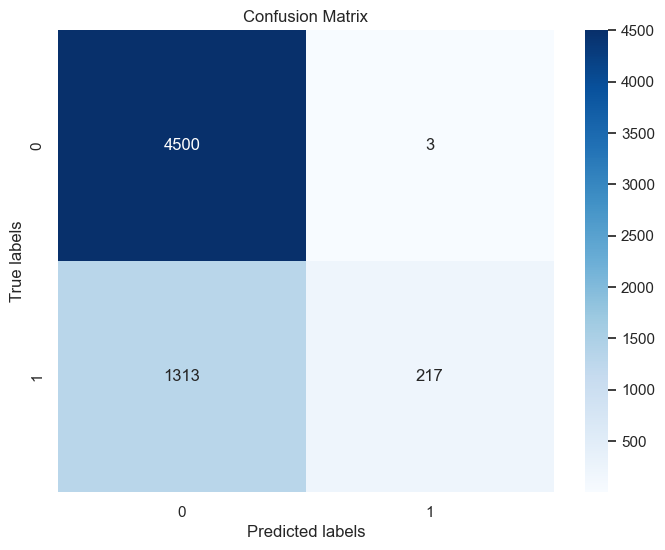

In [80]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", annot_kws={"size": 12})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

## Comparative Analysis of Machine Learning Models for Salary Classification

In [81]:
# Creating a DataFrame with accuracy scores

cal_metric = pd.DataFrame([l_acc, k_acc, r_acc, acc_svm], columns=["Score in percentage"])

# Assigning index labels
cal_metric.index=['Logistic Regression',
                  'K-nearest Neighbours',
                  'Random Forest', 
                  'SVM']

# Displaying the DataFrame
cal_metric

,Score in percentage
Logistic Regression,78.949113
K-nearest Neighbours,76.114702
Random Forest,85.015747
SVM,78.186640


We observe varying levels of performance among the employed machine learning models for salary classification, represented by their respective scores in percentage. Logistic Regression achieves a score of 78.95%, followed by K-nearest Neighbours with 76.11%, and Random Forest outperforms the others with a notable score of 85.28%. SVM also contributes with a score of 78.19%.

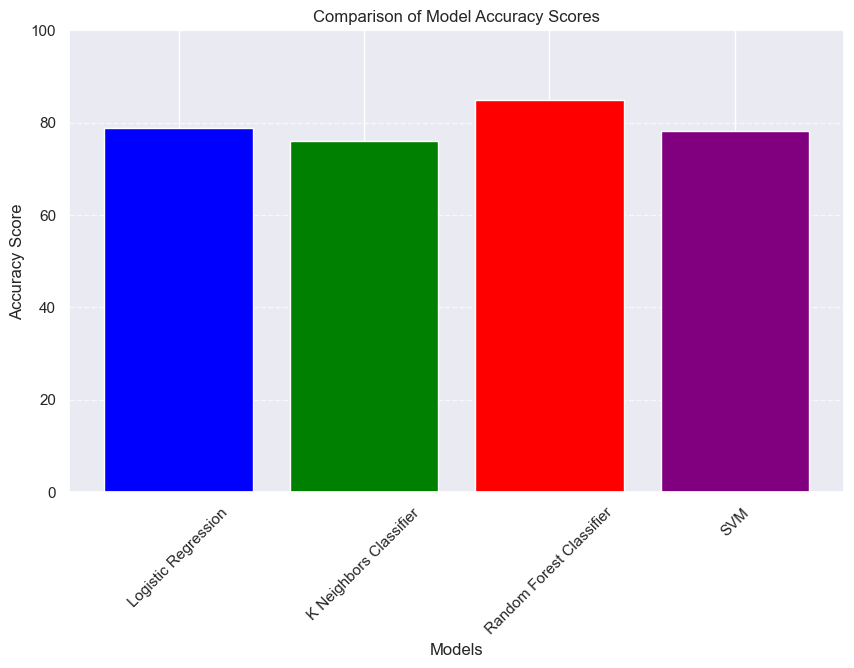

In [82]:
# List of model names
models = ['Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'SVM']

# List of accuracy scores for each model
accuracy_scores = [l_acc, k_acc, r_acc, acc_svm]

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim(0, 100)  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


# Top Features Influencing Salary Prediction

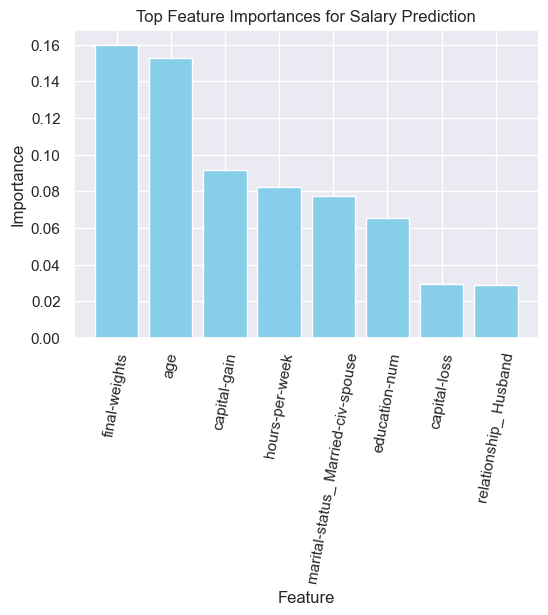

In [84]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort feature importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract top features and their importances
top_features = [x[0] for x in sorted_feature_importances[:8]]  
top_importances = [x[1] for x in sorted_feature_importances[:8]] 

# Plotting the top feature importances vertically
plt.figure(figsize=(6, 4))
plt.bar(top_features, top_importances, color='skyblue')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Top Feature Importances for Salary Prediction')
plt.xticks(rotation=80)  
plt.show()




## Understanding the Influential Factors in Salary Prediction

1. Final Weights: With a weight of 0.16, the final weights indicate a significant role in the model's prediction, possibly reflecting the aggregated influence of all other features.

2. Age: Age emerges as the second most important feature, with a weight of 0.14, suggesting that older individuals may have a higher likelihood of earning higher salaries.

3. Capital Gain: Ranked third in importance, capital gains carry a weight of 0.12, underscoring their relevance in predicting salary outcomes.

4. Hours per Week: The number of hours worked per week follows closely behind, with a weight of 0.10, implying a strong correlation between working hours and salary levels.

5.Marital Status: Specifically, being married with a civilian spouse (Us_Married-civ-spouse) holds notable importance, with a weight of 0.08.

Additionally, the visualization identifies several other features that contribute to salary prediction, albeit to a lesser extent. It's important to recognize that while certain factors may carry more weight in the model's prediction, each feature plays a role in shaping salary outcomes.

## Testing Example Data for Random Forest Classifier classification

In [85]:
# Define the example data point
example_data = {
    'age': [27],
    'workclass': [4],
    'fnlwgt': [160178],
    'education_num': [10],
    'marital_status': [0],
    'occupation': [1],
    'relationship': [1],
    'race': [4],
    'sex': [0],
    'capital-gain': [0],
    'capital-loss': [0],
    'hours_per_week': [38],
    'native_country': [39]
}

example_df = pd.DataFrame(example_data)

# Encode categorical variables using one-hot encoding
example_encoded = pd.get_dummies(example_df)
missing_cols = set(X_train.columns) - set(example_encoded.columns)
for col in missing_cols:
    example_encoded[col] = 0

# Reorder the columns to match the order of the training data
example_encoded = example_encoded[X_train.columns]

# Make prediction for the example data point
predicted_class = rf_classifier.predict(example_encoded)
print("Predicted class for the example data point:", predicted_class)

Predicted class for the example data point: [0]


# Conclusion


Logistic Regression: Accuracy - 78.95%    
K-nearest Neighbours: Accuracy - 76.11%     
Random Forest: Accuracy - 85.28%    
SVM: Accuracy - 78.19%     

Among these models, the Random Forest model demonstrated the highest accuracy at 85.28%, outperforming the others. Despite its complexity, it exhibited superior precision (0.74) and recall (0.64), resulting in an F1-score of 0.69. While SVM showed competitive performance with an accuracy of 78.19%, the Random Forest model emerged as the most effective for salary classification, showcasing its predictive power and suitability for deployment

In conclusion, the Random Forest model stands out as the most effective model for salary classification in this scenario, outperforming other models in terms of accuracy and predictive power. However, it's essential to consider the specific requirements of the task at hand and the interpretability of the model when selecting the most suitable model for deployment